# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

# TME 09X - Naive Bayes

<div class="alert alert-block alert-warning">
Dans ce TME, l'objectif est de classer des SMS selon deux catégories : spam (SMS non désiré) et ham (pas un spam).
Pour cela, nous allons utiliser un modèle bayésien naïf (Naive Bayes).
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1 - Pré-traitement des données

<div class="alert alert-block alert-warning">
Nous allons commencer par charger des données et regarder comment elles se présentent.
</div>

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour charger les données.
</div>

In [2]:
data = pd.read_csv('spam.csv', sep='\t', encoding = 'latin1')
data

,class,message
0,ham,Go until jurong point crazy.. Available only ...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives aro...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<div class="alert alert-block alert-info">
    Q1.1 - Écrire une instuction qui permet d'ajouter une colonne <code>'longueur'</code> qui contient la longueur de chaque message.
</div>

In [3]:
data["longueur"] = [len(i) for i in data["message"]]

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour voir la nouvelle colonne.
</div>

In [4]:
data

,class,message,longueur
0,ham,Go until jurong point crazy.. Available only ...,111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,Nah I don't think he goes to usf he lives aro...,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


<div class="alert alert-block alert-info">
    Q1.2 - Afficher l'histogramme des longueurs des messages (On adaptera le nombre de <code>bins</code>).
</div>

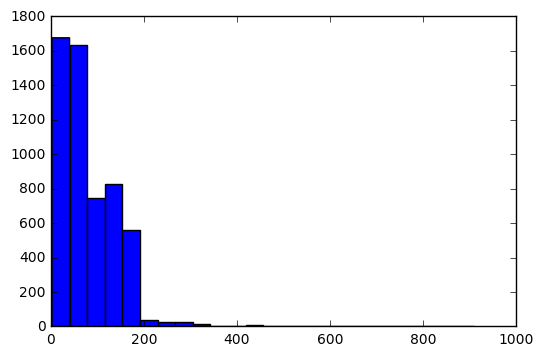

In [5]:
from math import *
_ = plt.hist(data["longueur"] , bins = int(len(data)**.5 -50))

<div class="alert alert-block alert-info">
    Q1.3 - Combien y-a-t-il de spams dans la base ? De hams ?
</div>

In [6]:
sum(data["class"] == "spam")  , sum(data["class"] == "ham") 

(747, 4825)

<div class="alert alert-block alert-info">
Exécuter les blocs suivants pour vous familialiser avec quelques fonctions utiles pour la suite.
</div>

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
"Coucou les amis".lower()

'coucou les amis'

In [9]:
"Coucou les amis".split()

['Coucou', 'les', 'amis']

<div class="alert alert-block alert-info">
Exécuter le bloc suivant pour définir une liste des mots les plus courants en anglais.
</div>

In [10]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop_words = set(stop_words)

<div class="alert alert-block alert-info">
    Q1.3 - Écrire une fonction <code>enleve_ponctuation</code> qui, étant donné un message <code>mess</code>, renvoie une chaîne de caractères du même message où les symboles de ponctuation ont été remplacés par des espaces.
</div>

In [11]:
def enleve_ponctuation(mess):
    return "".join(e if e not in string.punctuation else ' ' for e in mess)

<div class="alert alert-block alert-info">
    Tester votre fonction sur le premier message de la base <code>data</code>
</div>

In [12]:
enleve_ponctuation(data['message'].iloc[0])

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

<div class="alert alert-block alert-info">
    Q1.4 - Écrire une fonction <code>chaine_vers_liste</code> qui, étant donné un message <code>mess</code>, renvoie une liste de mots telle que :
    <ul>
        <li>il n'y a plus de ponctuation</li>
        <li>les "stop words" ont été éliminés</li>
    </ul>
    Attention, il faut aussi détecter les "stop words" qui contiendraient des majuscules dans les textes.
</div>

In [13]:
def chaine_vers_liste(mess):
    return [w for w in enleve_ponctuation(mess).split() if w.lower() not in stop_words]

<div class="alert alert-block alert-info">
    Tester votre fonction sur le premier message de la base <code>data</code>
</div>

In [14]:
chaine_vers_liste(data['message'].iloc[0])

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

<div class="alert alert-block alert-info">
    Exécuter le code suivant pour appliquer votre fonction à tous les message de <code>data</code> et stocker le résultat dans une nouvelle colonne <code>'message'</code>.
</div>

In [15]:
data['liste_mots'] = data['message'].apply(chaine_vers_liste)
data

,class,message,longueur,liste_mots
0,ham,Go until jurong point crazy.. Available only ...,111,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,Nah I don't think he goes to usf he lives aro...,61,"[Nah, think, goes, usf, lives, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,"[FreeMsg, Hey, darling, 3, week, word, back, l..."
6,ham,Even my brother is not like to speak with me. ...,77,"[Even, brother, like, speak, treat, like, aids..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[per, request, Melle, Melle, Oru, Minnaminungi..."
8,spam,WINNER!! As a valued network customer you have...,158,"[WINNER, valued, network, customer, selected, ..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[mobile, 11, months, U, R, entitled, Update, l..."


## 2 - Indexation

<div class="alert alert-block alert-info">
    Q2.1 - Écrire une fonction <code>indexation</code> qui, étant donné une base <code>data</code>, renvoie un dictionnaire <code>Dict[str, int]</code> qui associe, à chaque mot, un unique entier à partir de zéro et sans laisser de trou.
</div>

In [24]:
from itertools import chain

def indexation(data):
    return { w:i for i, w in enumerate(set(chain.from_iterable(data["liste_mots"]))) }

index = indexation(data)

<div class="alert alert-block alert-info">
    Q2.2 - Écrire une fonction <code>effectifs</code> qui, étant donné une base <code>data</code>, renvoie une matrice où les lignes correspondent aux lignes de <code>data</code> et où les colonnes sont les numéros des mots produits par la fonction <code>indexation</code>. Dans chaque case $(i, j)$ se trouvera le nombre d'apparition du mot $j$ dans le message $i$.
</div>

In [17]:
from collections import Counter

def effectifs(data):
    index = indexation(data)
    matrix = []
    for line in data["liste_mots"]:
        counter = Counter(map(index.get, line))
        matrix.append([counter[j] for j in range(len(index))])
    return np.array(matrix)

In [18]:
effs = effectifs(data)

In [42]:
sum(effs)

array([2, 4, 1, ..., 2, 5, 1])

## 3 - Estimation des probabilités

<div class="alert alert-block alert-warning">
On va considérer deux variables aléatoires $X$ et $Y$ :
    <ul>
        <li>$X$ est un message</li>
        <li>$Y$ est la classe d'un message et peut prendre deux valeurs : <code>'ham'</code> et <code>'spam'</code></li>
    </ul>

Nous devons estimer, à partir de la base <code>data</code>, les probabilités $p(X | Y = ham)$, $p(X | Y = spam)$, $p(Y = ham)$ et $p(Y = spam)$.

    
Soit M la variables aléatoire à valeurs dans les mots possibles.

On estime la probabilité d'un texte à partir des probabilités conditionnelles de ses mots : $p(M | Y = ham)$ et $p(M | Y = spam) :

$$ p(X = message | Y) = \prod_{mot \in message} p(M = mot | Y) $$

Il s'agit d'un modèle <em>sac de mots</em> dans lequel l'ordre des mots n'est pas pris en compte et pour lequel on fait l'hypothèse de l'indépendance des mots.
</div>

<div class="alert alert-block alert-info">
    Q3.1 - Estimer $p(Y = ham)$ dans une variable <code>PHam</code>.
</div>

In [19]:
PHam = sum(data["class"] == "ham")/len(data)

<div class="alert alert-block alert-info">
    Q3.2 - Estimer les $p(M = mot | Y = ham)$ dans un vecteur <code>PmHam</code> pour tous les mots.
</div>

In [55]:
hams = effs[np.array(data["class"] == "ham")]
PmHam = hams.sum(axis=0) / hams.sum()

<div class="alert alert-block alert-info">
    Q3.3 - Estimer les $p(Y = spam)$ dans une variable <code>PSpam</code>.
</div>

In [56]:
PSpam = 1 - PHam

<div class="alert alert-block alert-info">
    Q3.4 - Estimer les $p(M = mot | Y = spam)$ dans un vecteur <code>PmSpam</code> pour tous les mots.
</div>

In [57]:
spams = effs[np.array(data["class"] == "spam")]
PmSpam = spams.sum(axis=0) / spams.sum()

<div class="alert alert-block alert-info">
    Q3.5 - Calculer $P(Y = ham) P(X = message | Y = ham) = P(Y = ham) \prod_{mot \in message} P(M = mot | Y = ham)$ dans un vecteur <code>PhamX</code> pour tous les mots.
</div>

In [67]:
def prod(xs):
    r = 1
    for x in xs:
        r *= x
    return r

PHamX = np.array([
        PHam * prod(PmHam[index[mot]] for mot in message)
        for message in data[data["class"] == "ham"]["liste_mots"]]
)

<div class="alert alert-block alert-info">
    Q3.6 - Calculer $P(Y = spam) P(X = message | Y = spam) = P(Y = spam) \prod_{mot \in message} P(M = mot | Y = spam)$ dans un vecteur <code>PspamX</code> pour tous les mots.
</div>

In [68]:
PSpamX = np.array([
        PSpam * prod(PmSpam[index[mot]] for mot in message)
        for message in data[data["class"] == "spam"]["liste_mots"]]
)

<div class="alert alert-block alert-info">
    Q3.7 - Calculer les prédictions en comparant $p(Y = ham | X)$ et $p(Y = spam | X)$.

</div>

In [69]:
PM = effs.sum(axis=0) / effs.sum()
PX = np.array([prod(PM[index[mot]] for mot in message) for message in data["liste_mots"]])

In [70]:
PHamSX = [phx/px for phx, px in zip(PHamX, PX[np.array(data["class"] == "ham")])]
PSpamSX = [psx/px for psx, px in zip(PSpamX, PX[np.array(data["class"] == "spam")])]

<div class="alert alert-block alert-info">
    3.8 - Écrire une fonction <code>matrice_confusion</code> qui, étant donné le vecteur de prédictions et le vecteur des vraies classes, calcule la matrice de confusion $2 \times 2$ définie ainsi :
$$
\begin{bmatrix} 
    n_{\text{prediction spam}, \text{spam}} & n_{\text{prediction spam}, \text{ham}} \\
    n_{\text{prediction ham}, \text{spam}} & n_{\text{prediction ham}, \text{ham}} 
    \end{bmatrix}
$$
où $n_{i, j}$ est le nombre d'occurences où on a fait la prédiction de la classe $i$ alors que la vraie classe est $j$.
</div>

<div class="alert alert-block alert-info">
    Q3.9 - Produire la matrice de confusion entre les prédictions et les vraies classes.
</div>

## 4 - On évalue notre modèle correctement

<div class="alert alert-block alert-warning">
Nous n'avons pas évalué notre modèle correctement. Il faudrait séparer la base en deux partie : une réservée pour l'estimation des probabilités (apprentissage) et l'autre pour l'évaluation (test).
</div>

<div class="alert alert-block alert-info">
    Q4 - Évaluer correctement le modèle. (On créera à cet effet une fonction <code>apprentissage</code> qui regroupera ce qu'on a fait précédemment et une fonction <code>classer</code> qui classe un message en fonction des paramètres appris).
</div>